In [ ]:
# convert every image in every folder to gray 

# don't forget to do the preprocessing in the app for every new image to be fed to the model

# Grayscale the images

The raw data is provided in the **../training_data/raw** folder in 5 subfolders named after the plant name (image category). This data will be processed and the processed versions of the image files will be saved in the **../training_data/training** folder, retaining the same structure of subfolders for each category of image.

In [1]:
src_folder = "../plantnetSimplon/training_data/raw"
train_folder = "../plantnetSimplon/training_data/training"

The code below opens the main folder with the raw images as well as the subfolders, transforms every image to grayscale and saves it to the traing data subfolders. 

In [2]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Create the output folder if it doesn't already exist
if os.path.exists(train_folder):
    shutil.rmtree(train_folder)

In [4]:
# Loop through each subfolder in the input folder
for root, folders, files in os.walk(src_folder):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        # Create a matching subfolder in the output dir
        save_folder = os.path.join(train_folder,sub_folder)
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        # Loop through the files in the subfolder
        file_names = os.listdir(os.path.join(root,sub_folder))
        for file_name in file_names:
            # Open the file
            file_path = os.path.join(root,sub_folder, file_name)
#             print("reading " + file_path)
            # Create a gray version and save it
            image = Image.open(file_path).convert('L')
            save_as = os.path.join(save_folder, file_name)
#             print("writing " + save_as)
            image.save(save_as)

processing folder Campanula_persicifolia_L
processing folder Cichorium_intybus_L
processing folder Lepidium_draba_L
processing folder Leucanthemum_vulgare_(Vaill)_Lam
processing folder Malva_sylvestris_L


Check the original and the resulting version of the first image in each subfolder.

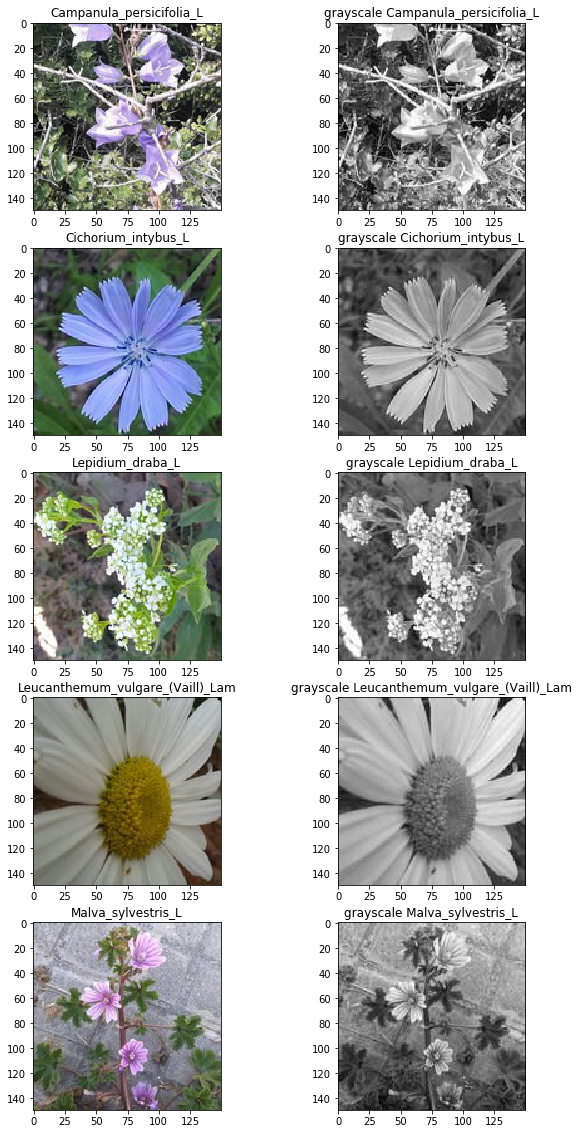

In [9]:
# Create a new figure
fig = plt.figure(figsize=(10,20))

# loop through the subfolders in the input directory
image_num = 0
for root, folders, filenames in os.walk(src_folder):
    for folder in folders:
        # Get the first image in the subfolder and add it to a plot that has two columns and row for each folder
        file = os.listdir(os.path.join(root,folder))[0]
        src_file = os.path.join(src_folder,folder, file)
        src_image = Image.open(src_file)
        image_num += 1
        a=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(src_image)
        a.set_title(folder)
        # The next image is the grayscaled counterpart - load and plot it
        gray_file = os.path.join(train_folder,folder, file)
        gray_image = Image.open(gray_file)
        image_num += 1
        b=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(gray_image, 'gray')
        b.set_title('grayscale ' + folder)